# HW2

# Part 1

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


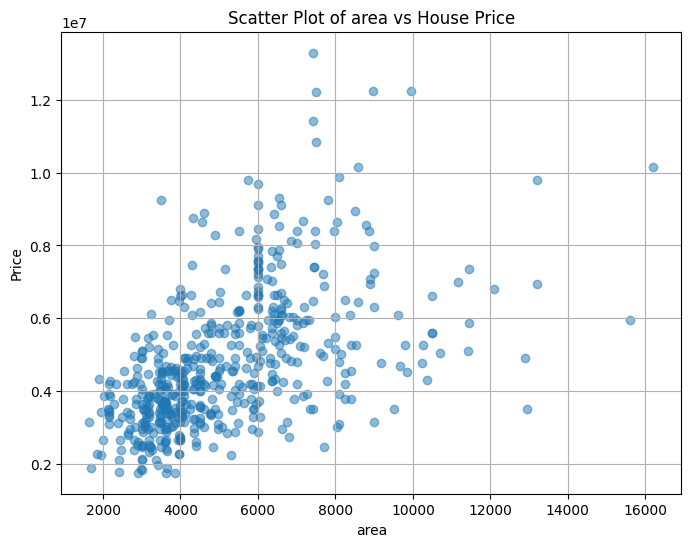

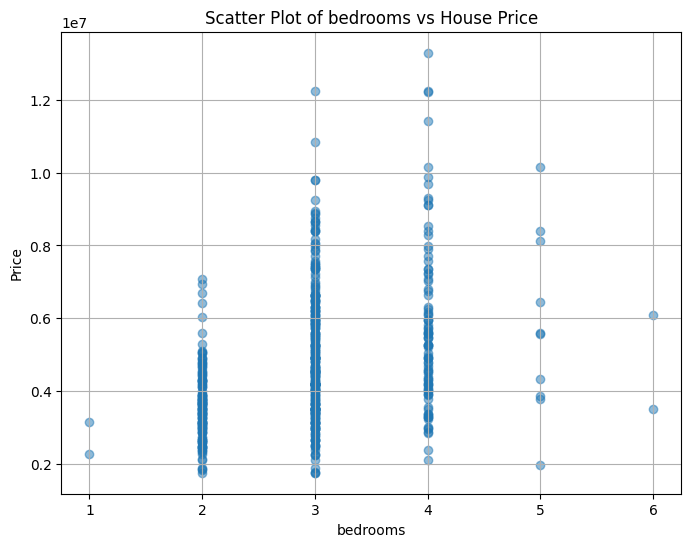

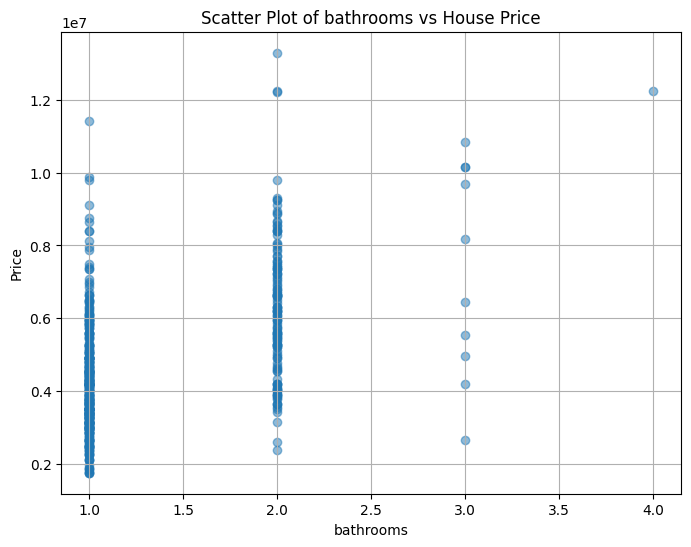

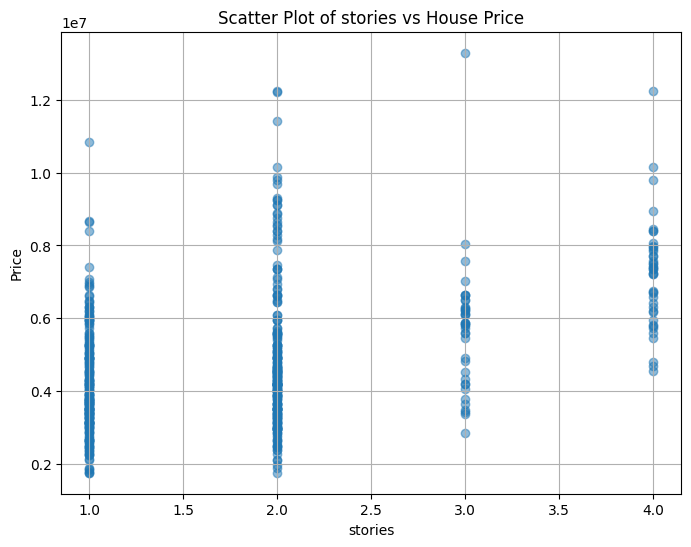

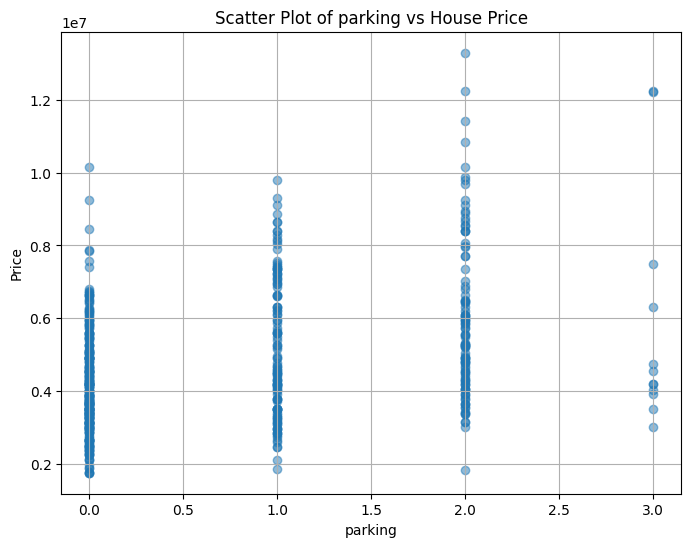

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("HW2.csv")  # Make sure the file is in your working directory

# Display basic statistics
print(df.describe())

# Create scatter plots for each independent variable against price
independent_vars = ["area", "bedrooms", "bathrooms", "stories", "parking"]

for var in independent_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[var], df["price"], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel("Price")
    plt.title(f"Scatter Plot of {var} vs House Price")
    plt.grid(True)
    plt.show()


## Interpretation of the Scatter Plots:
- Area vs. Price: The scatter plot shows a positive correlation between house area and price. Larger houses tend to have higher prices, though there is some variability, particularly for mid-sized homes.

- Bedrooms vs. Price: There is a weak positive trend, indicating that houses with more bedrooms generally have higher prices. However, some homes with fewer bedrooms still have high prices, suggesting other factors may play a role.

- Bathrooms vs. Price: Similar to bedrooms, houses with more bathrooms tend to be more expensive, but the relationship is not as strong as with area.

- Stories vs. Price: Comparitively, there is a slightly stronger positive trend, indicating that houses with more stories generally have higher prices. 

- Parking vs. Price: There is a weak positive trend, indicating that houses with more parking generally have higher prices. 

Overall, house area seems to be the most strongly correlated with price, while the number of bedrooms, bathrooms, stories, and parking have weaker relationships with price.

# Part 2

In [9]:
# Calculate Pearson correlation coefficients between house price and independent variables
correlation_matrix = df[["price"] + independent_vars].corr()
correlation_with_price = correlation_matrix["price"].drop("price")

# Display correlation values
print("\nCorrelation with House Price:")
print(correlation_with_price)




Correlation with House Price:
area         0.535997
bedrooms     0.366494
bathrooms    0.517545
stories      0.420712
parking      0.384394
Name: price, dtype: float64


## Interpretation of Correlation Coefficients:
- Area (0.536) has the strongest positive correlation with house price, which shows that larger houses tend to be more expensive.

- Bathrooms (0.518) also show a strong correlation, which still shows that homes with more bathrooms generally have higher prices.

- Stories (0.421) and bedrooms (0.366) have moderate correlations with price, but still show a positive relationship.

- Parking (0.384) has the weakest correlation among numeric variables but still shows a positive relationship.

# Part 3


In [11]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.Collecting statsmodels
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.8 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 8.4 MB/s eta 0:00:01
   --------------------------------- ------ 8.1/9.8 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 10.5 MB/s eta 0:00:00




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           7.39e-42
Time:                        13:43:14   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+06   1.74e+05     13.681      0.0

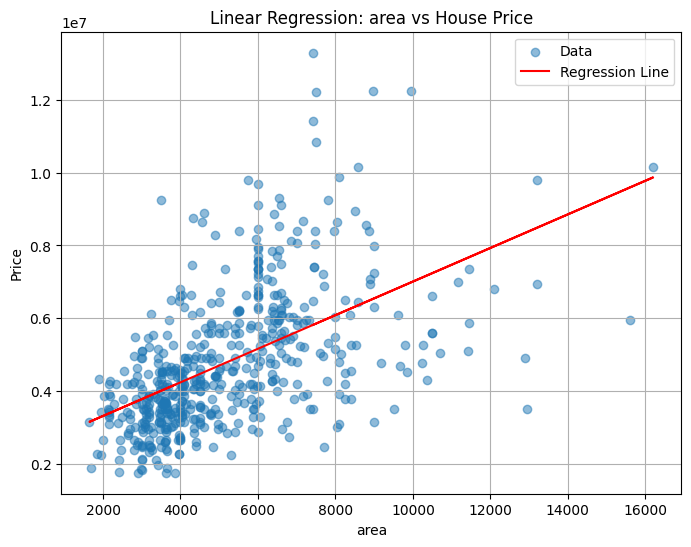

In [15]:
import numpy as np
import statsmodels.api as sm

# Select the independent variable with the strongest correlation
strongest_variable = correlation_with_price.idxmax()

# Define the independent (X) and dependent (y) variables
X = df[[strongest_variable]]
y = df["price"]

# Add a constant term for the intercept in the regression model
X = sm.add_constant(X)

# Fit the linear regression model using the least squares method
model = sm.OLS(y, X).fit()

# Get model parameters (intercept and slope)
intercept, slope = model.params

# Calculate R-squared value
r_squared = model.rsquared

# Display regression summary
print(model.summary())

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(df[strongest_variable], df["price"], alpha=0.5, label="Data")
plt.plot(df[strongest_variable], intercept + slope * df[strongest_variable], color="red", label="Regression Line")
plt.xlabel(strongest_variable)
plt.ylabel("Price")
plt.title(f"Linear Regression: {strongest_variable} vs House Price")
plt.legend()
plt.grid(True)
plt.show()


## Interpretation of the Regression Model:
- The slope (461.97) means that for each additional square unit of area, the expected house price increases by approximately $462.

- The intercept (2.387e+06) suggests that the starting house price, regardless of area, would be around $2.39 million.


# Part 4


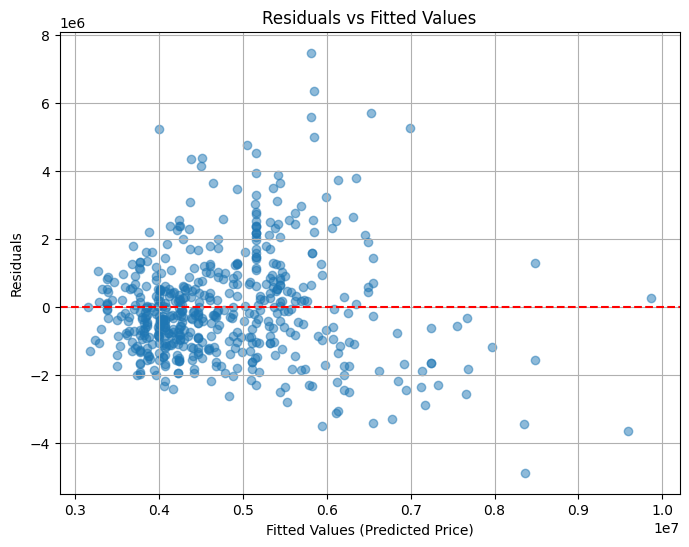

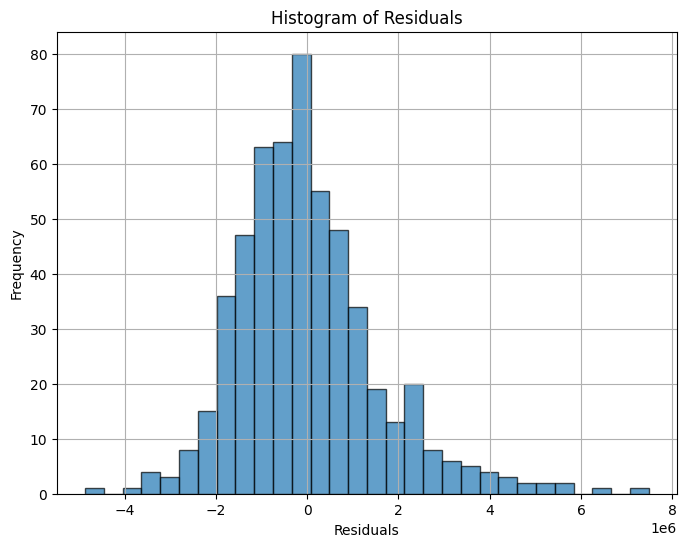

In [16]:
# Calculate residuals
df["residuals"] = y - model.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, df["residuals"], alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Fitted Values (Predicted Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(df["residuals"], bins=30, edgecolor="black", alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()


## Interpretation of Residuals:
The residuals do not appear to be randomly scattered, meaning there might be some other features that are not included in the model that are important in determining the price of a house.

There might be heteroscedasticity, meaning variance in house prices changes depending on the predicted value.

The histogram of residuals suggests possible skewness, indicating the presence of outliers or non-linear relationships.


# Part 5

In [17]:
# Define the independent (X) and dependent (y) variables using all independent variables
X_all = df[independent_vars]  # All numeric independent variables
y = df["price"]

# Add a constant term for the intercept in the regression model
X_all = sm.add_constant(X_all)

# Fit the multiple linear regression model using the least squares method
model_all = sm.OLS(y, X_all).fit()

# Get model parameters and R-squared value
r_squared_all = model_all.rsquared

# Display regression summary
print(model_all.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     138.1
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           4.37e-94
Time:                        13:52:04   Log-Likelihood:                -8418.8
No. Observations:                 545   AIC:                         1.685e+04
Df Residuals:                     539   BIC:                         1.688e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.457e+05   2.47e+05     -0.591      0.5

## Interpretation of the Multiple Regression Model:

R-squared Comparison:
- Single-variable model (using area): 0.287
- Multiple regression model (using all IVs): 0.536

The multiple regression model has a higher R-squared value, indicating that using multiple independent variables provides a better fit. However, the variables are contributing to the model differently, so it is not clear which variables are most important.



Multiple Regression Coefficients Interpretation:
- Intercept: When all independent variables are 0, the predicted house price is -282091.29. This does not seem meaningful in a real-world context.

- Area: For each unit increase in area, the house price is expected to change by $380, assuming all else remains constant.

- Bedrooms: For each unit increase in bedrooms, the house price is expected to change by $198,295, assuming all else remains constant.

- Bathrooms: For each unit increase in bathrooms, the house price is expected to change by $1,200,180, assuming all else remains constant.

- Stories: For each unit increase in stories, the house price is expected to change by $531,595, assuming all else remains constant.

- Parking: For each unit increase in parking, the house price is expected to change by about $377,600, assuming all else remains constant.






# Part 6


In [18]:
%pip install scikit-learn



  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Set up k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X_simple = df[[strongest_variable]].values  # Using the strongest predictor
y_simple = df["price"].values

# Initialize model and lists to store results
model_simple = LinearRegression()
mse_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X_simple):
    X_train, X_test = X_simple[train_index], X_simple[test_index]
    y_train, y_test = y_simple[train_index], y_simple[test_index]

    # Train the model
    model_simple.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model_simple.predict(X_test)
    
    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate mean and standard deviation of MSE scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

# Display results
cross_val_results = f"""
**5-Fold Cross-Validation Results for Simple Linear Regression Model (using {strongest_variable}):**
- Mean MSE: {mean_mse:.2f}
- Standard Deviation of MSE: {std_mse:.2f}
"""

print(cross_val_results)



**5-Fold Cross-Validation Results for Simple Linear Regression Model (using area):**
- Mean MSE: 2550134840966.05
- Standard Deviation of MSE: 754047097163.83



## How k-Fold Cross-Validation Helps in Model Assessment:

- Reduces overfitting – Ensures the model isn’t too dependent on a single train-test split.

- Provides a more reliable performance estimate – Uses multiple test sets, making the evaluation more robust.

- Improves generalization – Helps assess how well the model performs on unseen data.

- Detects instability – A high variation in MSE across folds indicates an inconsistent model.

- In short, k-fold cross-validation gives a fairer, more accurate measure of model performance.



Information from: https://www.datacamp.com/tutorial/k-fold-cross-validation
